<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Исследование-данных" data-toc-modified-id="Исследование-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Исследование данных</a></span><ul class="toc-item"><li><span><a href="#Открываем-файл-с-данными-и-анализируем-содержимое" data-toc-modified-id="Открываем-файл-с-данными-и-анализируем-содержимое-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Открываем файл с данными и анализируем содержимое</a></span></li><li><span><a href="#Разделяем-выборки-без-шифрования" data-toc-modified-id="Разделяем-выборки-без-шифрования-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Разделяем выборки без шифрования</a></span></li><li><span><a href="#Модель-линейной-регрессии-без-шифрования,-проверяем-метрику-R2" data-toc-modified-id="Модель-линейной-регрессии-без-шифрования,-проверяем-метрику-R2-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Модель линейной регрессии без шифрования, проверяем метрику R2</a></span></li><li><span><a href="#Преобразуем-выборки-в-матрицы-и-шифруем-при-помощи-обратимой-матрицы" data-toc-modified-id="Преобразуем-выборки-в-матрицы-и-шифруем-при-помощи-обратимой-матрицы-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Преобразуем выборки в матрицы и шифруем при помощи обратимой матрицы</a></span></li><li><span><a href="#Модель-линейной-регрессии-c-шифрованием-данных-признаков,-проверяем-метрику-R2" data-toc-modified-id="Модель-линейной-регрессии-c-шифрованием-данных-признаков,-проверяем-метрику-R2-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Модель линейной регрессии c шифрованием данных признаков, проверяем метрику R2</a></span></li><li><span><a href="#Проанализируем-почему-умножение-признаков-на-обратимую-матрицу-не-влияет-на-работу-модели-линейнной-регрессии" data-toc-modified-id="Проанализируем-почему-умножение-признаков-на-обратимую-матрицу-не-влияет-на-работу-модели-линейнной-регрессии-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Проанализируем почему умножение признаков на обратимую матрицу не влияет на работу модели линейнной регрессии</a></span></li><li><span><a href="#А-вот-интересно-а-если-придумать-матрицу-4:4-необратимую" data-toc-modified-id="А-вот-интересно-а-если-придумать-матрицу-4:4-необратимую-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>А вот интересно а если придумать матрицу 4:4 необратимую</a></span></li></ul></li></ul></div>

The version of the notebook server is: 6.1.4

The server is running on this version of Python: Python 3.8.5

OS Windows 10 Home

Configurable nbextensions Table of Contents (2) compatibility: 4.x, 5.x (https://www.codegrepper.com/code-examples/shell/install+toc2+jupyter+notebook)

<b>Описание проекта:</b>

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.
Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.




Импортируем модули и библиотеки:

In [1]:
import pandas as pd # импорт библиотеки pandas
import matplotlib.pyplot as plt # импорт библиотеки работы с графиками
import numpy as np # импорт библиотеки для вычислений
import warnings
warnings.filterwarnings('ignore') # отключаем сообщения об ошибках pandas
pd.set_option('display.max_columns', None) # Сброс ограничений на число выводимых столбцов
from pandas.plotting import scatter_matrix # импорт метода для матрицы кореляций
from sklearn.linear_model import LinearRegression # импорт модели линейной регрессии
from sklearn.model_selection import train_test_split # импорт метода для разделения таблицы
from sklearn.metrics import r2_score # импорт метрики R2

## Исследование данных

### Открываем файл с данными и анализируем содержимое



Функция для чтения файла в таблицу с учетом возможности работы на разных платформах и заодно исследование данных в таблицах:


In [2]:
def read_csv(link):
    link1 = 'datasets/' + link
    link2 = '/datasets/' + link
    try:
        name_link = pd.read_csv(link1)
    except:
        name_link = pd.read_csv(link2)
    display(name_link.head()) #просмотрим сразу первые пять строк
    display(name_link.info()) #просмотрим информацию    
    display(name_link.nunique()) # посчитаем уникальные значения
    display(name_link.columns) #проверим имена столбцов
    display('Количество явных дубликатов:', name_link.duplicated().sum()) #проверка на явные дубликаты
    display(name_link.describe()) #проверим численные данные
    display(name_link.corr()) #проверим корреляции
    return name_link

In [3]:
df = read_csv('insurance.csv')

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


None

Пол                    2
Возраст               46
Зарплата             524
Члены семьи            7
Страховые выплаты      6
dtype: int64

Index(['Пол', 'Возраст', 'Зарплата', 'Члены семьи', 'Страховые выплаты'], dtype='object')

'Количество явных дубликатов:'

153

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
Пол,1.000000,0.002074,0.014910,-0.008991,0.010140
Возраст,0.002074,1.000000,-0.019093,-0.006692,0.651030
Зарплата,0.014910,-0.019093,1.000000,-0.030296,-0.014963
Члены семьи,-0.008991,-0.006692,-0.030296,1.000000,-0.036290
Страховые выплаты,0.010140,0.651030,-0.014963,-0.036290,1.000000


Посмотрим на распределения: Создадим функцию построения гистограмм

In [4]:
def hist(col):
    plt.hist(df[col], range = (df[col].min(), df[col].max()), bins=df[col].nunique(), label = col)
    plt.ylabel('Частотность')
    plt.xlabel(col)
    plt.legend()
    plt.grid();

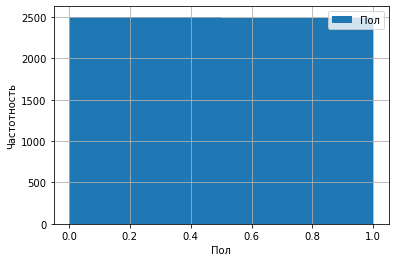

In [5]:
hist('Пол')

Количество мужчин и женщин практически одинаковое

In [6]:
print(len(df[df['Пол'] == 0]))
print(len(df[df['Пол'] == 1]))

2505
2495


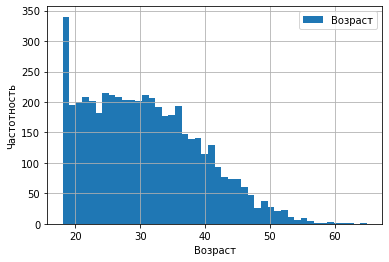

In [7]:
hist('Возраст')

Есть выброс 18 летних, возможно проводилась компания по привлечению к страхованию совершеннолетних

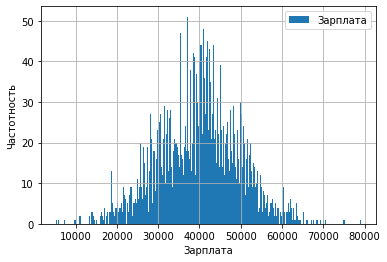

In [8]:
hist('Зарплата')

По зарплате боле менее нормальное распределение

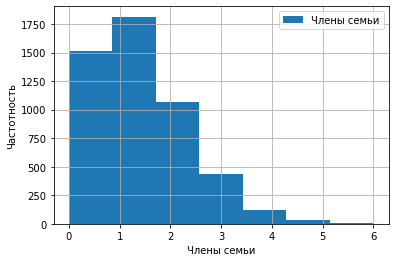

In [9]:
hist('Члены семьи')

Видимо 0 означает, что страхователь один. 1 более всего так как сюда попадают женатые, с одним ребенком, с одним родителем, с сестрой или братом.

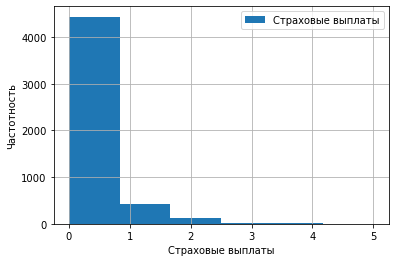

In [10]:
hist('Страховые выплаты')

Хорошее распределение, страховых случаев немного, соответственно немного и страховых выплат.

Посмотрим на матрицу корреляций

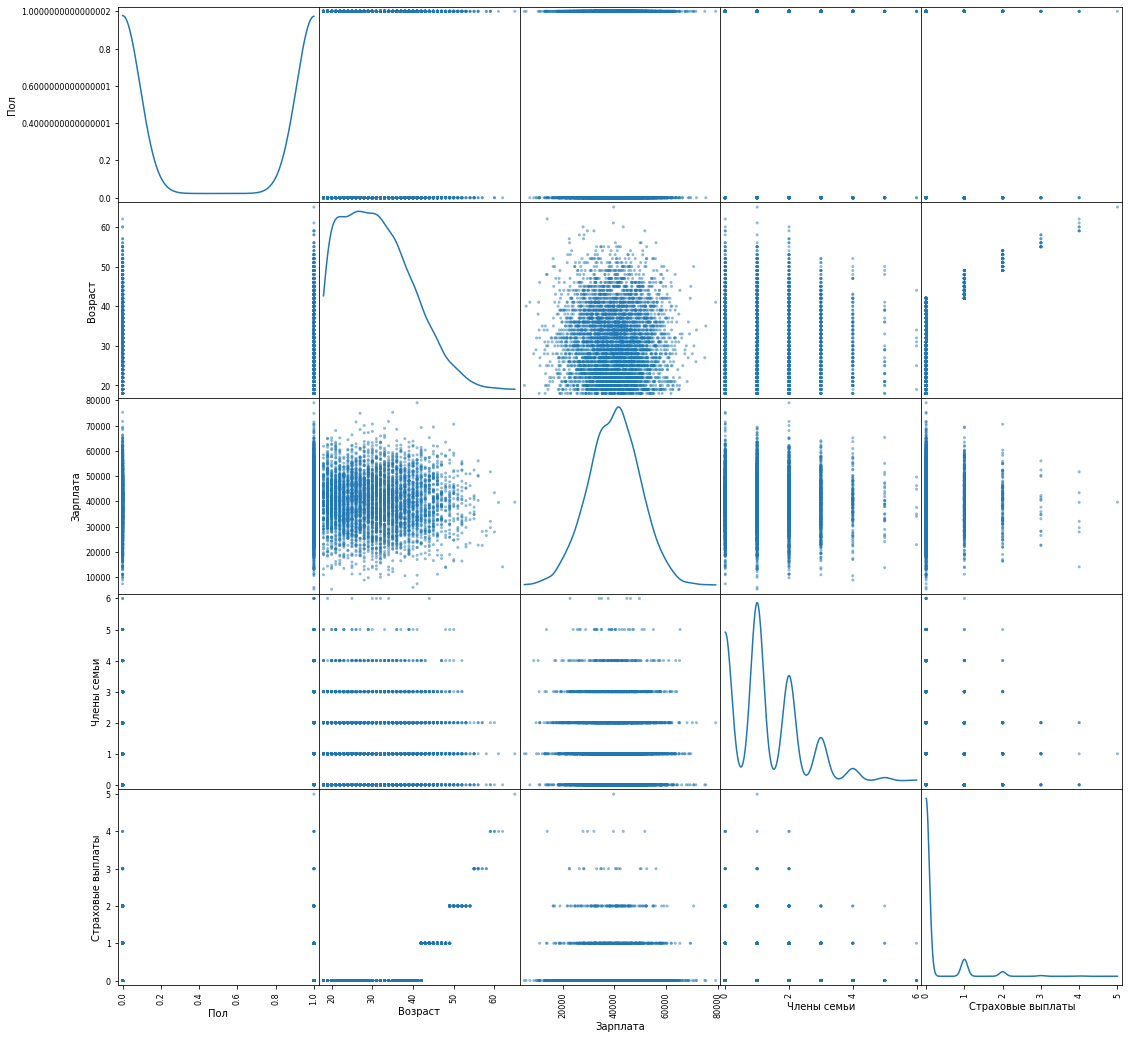

In [11]:
scatter_matrix(df,diagonal='kde', figsize=(18, 18))
plt.show()

<b>Выводы и замечания:</b>


- переименовывать столбцы (и отдельно расписывать расшивровки) видимо смысла нет, так как данные весьма понятны и нацелены на рускоязычную аудиторию, хотя если таки и их шифровать


- пропусков нет


- 153 явных дубликата, но скорее всего из таблицы выкинут столбец уникального ID клиента, так как данные в самих столбцах большая вероятность, что могут и совпадать, так как не особо то и уникальны, поэтому не будем их удалять


- по максимальным и минимальным значениям все впорядке - интересто, что с нулевыми зарплатами клиентов нет, видимо включены пенсионные выплаты.


- высокая корреляция между возрастом и количеством страховых выплат


- по матрице корреляций интересно посмотреть распределения по страховым выплатам: 1) по полу примерно распределение одинаковое, разве, что в пола 0 нет 5-ти случаев 2) весьма выгодно иметь в клиентах людей от 18 до 40 (судя по всему страхование здоровья)  3) по идее у людей с большей зарплатой и здоровье должно быть получше, но здесь такая зависимоть не наблюдается 4) по членам семьи есть странность - чем больше членов, тем меньше страховых случаев (некогда болеть, надо бороться за место под солнцем?)


- как целевой признак у нас колонка 'Страховые выплаты'


- преобразовывать текущую талицу не требуется

### Разделяем выборки без шифрования

Выделим признаки для обучения  целевой признак

In [12]:
target = df.loc[:, 'Страховые выплаты']
features = df.drop(['Страховые выплаты'], axis=1)

Разделим на выборки для обучения  для тестирования

In [13]:
features_train, features_test, target_train, target_test = train_test_split(features, target
                                                                            , test_size=0.25, random_state=12345)

Проверим как разделилось

In [14]:
features_train.shape

(3750, 4)

In [15]:
target_train.shape

(3750,)

### Модель линейной регрессии без шифрования, проверяем метрику R2


In [16]:
model = LinearRegression()
model.fit(features_train, target_train)
predictions = model.predict(features_test)
r2 = r2_score(target_test, predictions)
print(r2)

0.4352275712702701


### Преобразуем выборки в матрицы и шифруем при помощи обратимой матрицы

In [17]:
features_train_mtx = features_train.values
features_test_mtx = features_test.values

создадим марицу 4х4 по количеству столбцов признаков, применим numpy случайный генератор матриц

In [18]:
mtx = np.random.random((4, 4))
print(mtx)

[[0.05248174 0.41285647 0.28183272 0.75180957]
 [0.64546929 0.03778116 0.81975976 0.89908371]
 [0.37406371 0.10448326 0.74304728 0.64225461]
 [0.94820019 0.4865468  0.18954801 0.68561738]]


проверим матрицу на обратимость

In [19]:
revert_mtx = np.linalg.inv(mtx)
print(revert_mtx)

[[-1.11598795  0.33970046 -0.1971206   0.96291738]
 [ 0.35740163 -4.18353893  4.17901207  1.17946831]
 [-0.7926813  -2.29002082  4.18523434 -0.04830719]
 [ 1.50891526  3.13214399 -3.85007456 -0.69681496]]


Для полного счастья проверим  - умножив эти две матрицы должны получить еденичную матрицу

In [20]:
print(mtx@revert_mtx)

[[ 1.00000000e+00  0.00000000e+00  2.22044605e-16  6.93889390e-18]
 [-2.22044605e-16  1.00000000e+00 -4.44089210e-16  1.11022302e-16]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  2.08166817e-16 -1.11022302e-16  1.00000000e+00]]


Мда вот и вылез наш примерный питон, округлим

In [21]:
print(np.round(mtx@revert_mtx, 10))

[[ 1.  0.  0.  0.]
 [-0.  1. -0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0. -0.  1.]]


Итого получаем еденичную матрицу, проверка матриц прошла успешно

Умножаем признаки на обратимую матрицу

In [22]:
features_train_crypt_mtx = features_train_mtx@mtx
features_test_crypt_mtx = features_test_mtx@mtx

Преобразовываем мтрицы обратно в пандас таблицы

In [23]:
features_train_crypt = pd.DataFrame(features_train_crypt_mtx, columns=features_train.columns)
features_test_crypt = pd.DataFrame(features_test_crypt_mtx, columns=features_train.columns)

Проверим что получилось

In [24]:
features_train_crypt.head

<bound method NDFrame.head of                Пол      Возраст      Зарплата   Члены семьи
0     13569.862115  3784.818136  26934.032487  23289.714975
1     21568.068057  6019.933401  42827.676834  37025.186297
2     15395.621644  4295.957679  30565.664955  26426.120842
3     16894.458356  4714.041858  33541.133103  28998.735624
4     18950.820546  5289.073011  37625.623397  32529.124356
...            ...          ...           ...           ...
3745  12034.554758  3355.499571  23886.247510  20654.134555
3746   8513.112128  2374.774144  16890.884659  14607.096502
3747  16748.112700  4672.850315  33248.294824  28747.081008
3748  18758.584930  5237.388880  37245.461497  32199.478364
3749  15274.063230  4263.634998  30331.904347  26221.070753

[3750 rows x 4 columns]>

In [25]:
features_test_crypt.head

<bound method NDFrame.head of                Пол      Возраст      Зарплата   Члены семьи
0     14613.577925  4078.040247  29006.654077  25080.342093
1     16156.315708  4506.090814  32066.704734  27727.499190
2     15773.307919  4400.631720  31314.542836  27074.735232
3     13030.326448  3636.773197  25874.440444  22368.442166
4     14992.805388  4182.825760  29756.259432  25729.789375
...            ...          ...           ...           ...
1245  10882.715367  3033.327434  21590.839717  18673.360057
1246  21682.486301  6052.700239  43050.339902  37219.020449
1247  15845.538784  4421.377248  31459.873252  27199.589820
1248  15472.120544  4316.931766  30717.645735  26558.234292
1249  11665.957535  3251.767322  23149.128099  20018.859147

[1250 rows x 4 columns]>

In [26]:
features_train_crypt.describe()

,Пол,Возраст,Зарплата,Члены семьи
count,3750.000000,3750.000000,3750.000000,3750.000000
mean,14959.113589,4174.411649,29698.805363,25677.019817
std,3693.104976,1031.563135,7336.158302,6340.995857
min,1996.447724,555.416324,3955.017145,3423.368544
25%,12470.406133,3480.538305,24759.814428,21405.745865
50%,15088.150945,4211.674421,29961.295242,25901.185339
75%,17487.839015,4881.582762,34723.212456,30019.570639
max,29579.446108,8257.112804,58735.005982,50777.099811


Мда теперь черт ногу сломит, как стало все непонятно

А теперь дишефруем наши данные:

In [27]:
np.round(features_test_crypt@revert_mtx).head()

,0,1,2,3
0,0.0,33.0,39000.0,4.0
1,0.0,50.0,43100.0,2.0
2,1.0,39.0,42100.0,0.0
3,0.0,20.0,34800.0,0.0
4,-0.0,41.0,40000.0,4.0


In [28]:
features_test.head()

,Пол,Возраст,Зарплата,Члены семьи
3183,0,33.0,39000.0,4
1071,0,50.0,43100.0,2
2640,1,39.0,42100.0,0
2282,0,20.0,34800.0,0
1595,0,41.0,40000.0,4


даст ист фантастишь! ))))

### Модель линейной регрессии c шифрованием данных признаков, проверяем метрику R2

In [29]:
model_crypt = LinearRegression()
model_crypt.fit(features_train_crypt, target_train)
predictions_crypt = model_crypt.predict(features_test_crypt)
r2_crypt = r2_score(target_test, predictions_crypt)
print(r2_crypt)

0.4352275712699796


In [30]:
print(r2)

0.4352275712702701


Процентное отношение:


In [31]:
print((1 - r2/r2_crypt) * 100, '%')

-6.674660824046441e-11 %


Как видим разница исчезающе мала

### Проанализируем почему умножение признаков на обратимую матрицу не влияет на работу модели линейнной регрессии

Из курса обучения мы знаем формулу расчета множителя весов w

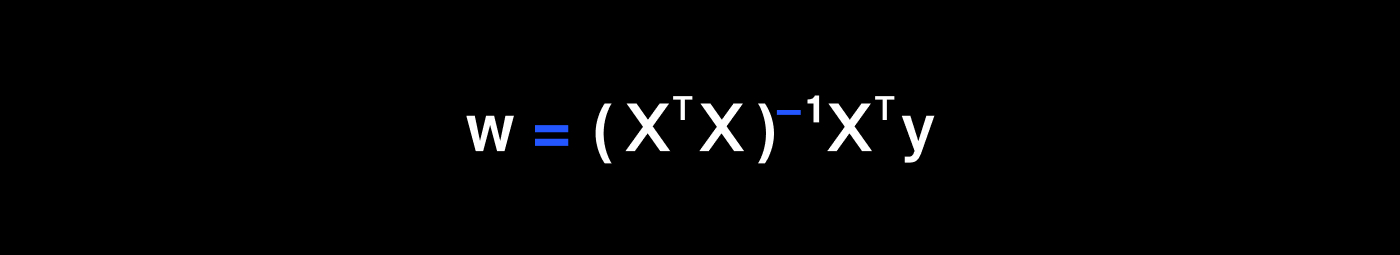

где <b>X</b> наша первоначальная матрица признаков, а <b>y</b> целевой признак

Обозначим нашу обратимую матрицу R и соответсвенно вместо X у нас в новой модели появится матрица X@R и новые веса wr

ну и далее работаем по алгебраическим правилам работы с матрицами



$$wr = ((XR)^TXR)^{-1}(XR)^Ty$$

$$wr = (X^TR^TXR)^{-1}X^TR^Ty$$

$$wr = (X^T)^{-1}(R^T)^{-1}X^{-1}R^{-1}X^TR^Ty$$

Так как R обратимая то: $$(R^T)^{-1}R^T = E\ , \ где\ Е\  -\ единичная\ матрица\ и\ оно\ исчезает!$$

При этом не забываем что такой же финт ушами с Х сделать не можем, так как Х вполне может быть и не обратимой, да и нам это повредит даже...

$$wr = (X^T)^{-1}X^{-1}R^{-1}X^Ty$$

Далее немного сгруппируем и замечаем что появилась формула для w: $$wr = (X^TX)^{-1}X^TyR^{-1}$$

$$w = (X^TX)^{-1}X^Ty$$

Ну и получаем: $$wr = wR^{-1}$$

Еще у нас есть формула предсказаний линейной регрессии:

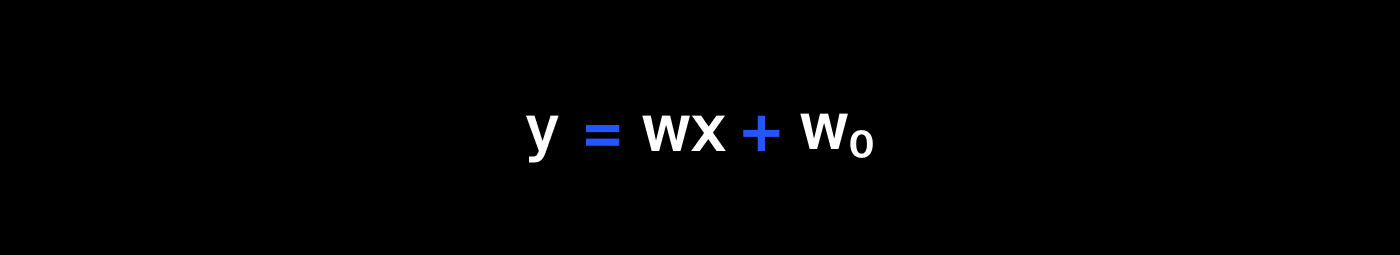

Ну что же возьмем, что у нас при сравнении и расчете y - расчитаннного по реальным признакам и yr  - расчитанного по шифрованным признакам, параметр w0 одинаков и не влияет на сравнение y и yr, тогда имеем:

$$yr = wrXr\,\ где \ Xr = XR$$

$$yr = wR^{-1}XR$$

Опять финт с умножением обратимой матрицы и: $$yr = wX = y$$

<b>Вывод:</b> При необходимости шифрования данных в таблице, можно путем умножения на обратимую матрицу получить очень даже зашифрованные данные, по которым сразу же можно делать необходимые предсказания при помощи модели линейной регрессии.

При этом если у вас на руках есть матрица при помощи которой происходит шифрование, то и получить данные в нормальный виде не проблема и далее их уже проанализировать или еще что то важное с ними сделать.

### А вот интересно а если придумать матрицу 4:4 необратимую

In [32]:
m = np.array([[1,2,3,4],[2,3,4,5],[3,4,5,6],[4,5,6,7]])
print(m)

[[1 2 3 4]
 [2 3 4 5]
 [3 4 5 6]
 [4 5 6 7]]


In [33]:
print(np.linalg.inv(m))

LinAlgError: Singular matrix

Матрица не обратима

In [34]:
features_train_crypt_m = features_train_mtx@m
features_test_crypt_m = features_test_mtx@m

In [35]:
features_train_m = pd.DataFrame(features_train_crypt_m, columns=features_train.columns)
features_test_m = pd.DataFrame(features_test_crypt_m, columns=features_train.columns)

In [36]:
features_train_m.head

<bound method NDFrame.head of            Пол   Возраст  Зарплата  Члены семьи
0     108691.0  144936.0  181181.0     217426.0
1     172869.0  230504.0  288139.0     345774.0
2     123368.0  164501.0  205634.0     246767.0
3     135376.0  180513.0  225650.0     270787.0
4     151874.0  202509.0  253144.0     303779.0
...        ...       ...       ...          ...
3745   96384.0  128526.0  160668.0     192810.0
3746   68172.0   90904.0  113636.0     136368.0
3747  134187.0  178930.0  223673.0     268416.0
3748  150360.0  200486.0  250612.0     300738.0
3749  122438.0  163257.0  204076.0     244895.0

[3750 rows x 4 columns]>

In [37]:
model_m = LinearRegression()
model_m.fit(features_train_m, target_train)
predictions_m = model_m.predict(features_test_m)
r2_m = r2_score(target_test, predictions_m)
print(r2_m)

0.4248216423871901


In [38]:
print((1 - r2/r2_m) * 100, '%')

-2.4494818165586407 %


Ну что же вполне себе 2,5 % падение характеристики R2

In [39]:
m = np.array([[32,11,42,36],[24,46,11,66],[26,36,24,35],[42,34,33,66]])
print(m)

[[32 11 42 36]
 [24 46 11 66]
 [26 36 24 35]
 [42 34 33 66]]


In [41]:
key = np.random.random((4, 4))
print(key)

[[0.85665736 0.50326358 0.31046334 0.9386707 ]
 [0.18063967 0.34510553 0.95493898 0.36002815]
 [0.10066383 0.1487431  0.09004235 0.74588533]
 [0.65348503 0.51306299 0.17443479 0.11058164]]


In [42]:
crypt = m@key
print(crypt)

[[57.15341384 44.61807307 30.50058634 69.30589492]
 [73.10651576 63.45151142 63.88147465 54.59251873]
 [54.06402755 47.03569098 50.7160837  59.13805692]
 [88.57327642 71.64133774 59.99147863 83.57773073]]


In [44]:
revert = np.linalg.inv(key)
print(revert)

[[ 2.90426389 -0.33026248 -3.24558583 -1.68571183]
 [-4.03599685  0.05975728  4.36813139  4.60141996]
 [ 0.78945035  1.12704913 -1.36915718 -1.13553273]
 [ 0.31759359 -0.10340081  1.07290731 -0.55302499]]


In [45]:
print(crypt@revert)

[[32. 11. 42. 36.]
 [24. 46. 11. 66.]
 [26. 36. 24. 35.]
 [42. 34. 33. 66.]]


[[105.38135751  84.25621656  75.18727989 100.12589683]
 [116.19504271  96.20064342  98.56408634 145.15245956]
 [ 98.56196908  81.3259486   76.58344243 112.05045753]
 [149.47398494 121.10348452 115.89249772 162.92296407]]


In [47]:
m = np.array([[1,2,3,4],[2,3,4,5],[3,4,5,6]])
print(m)

[[1 2 3 4]
 [2 3 4 5]
 [3 4 5 6]]


In [50]:
n = np.array([1,2,3,4])
print(n)

[1 2 3 4]


In [51]:
print(m@n)

[30 40 50]


In [52]:
print(n@m)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 4)